In [100]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [101]:
from sklearn.cluster import KMeans

In [102]:
import pandas as pd
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [103]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [104]:
# so we can preprocess the Species into 3 groups but before that we need to preprocess the data a littel bit

In [106]:
df = df.drop('Id',axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [107]:
X = df.values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa']], dtype=object)

In [108]:
from sklearn import preprocessing

Species = preprocessing.LabelEncoder()
Species.fit(['Iris-setosa','Iris-versicolor','Iris-virginica'])
X[:,4] = Species.transform(X[:,4])
y = X[:,4]


In [109]:
X[:,4]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=object)

In [110]:
IrisData = StandardScaler().fit_transform(X)
IrisData[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673, -1.22474487],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673, -1.22474487],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673, -1.22474487],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673, -1.22474487],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673, -1.22474487]])

In [111]:
# Modelling

In [126]:
K_mean = KMeans(init="k-means++",n_clusters=3,n_init=5)

In [127]:
K_mean.fit(X)
labels = K_mean.labels_
print(labels)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [128]:
KMeans()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [135]:
df["Clus_km"] = labels
df.tail(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Clus_km
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0
149,5.9,3.0,5.1,1.8,Iris-virginica,0


In [130]:
df.groupby('Clus_km').mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Clus_km,,,,
0,6.622449,2.983673,5.573469,2.032653
1,5.006000,3.418000,1.464000,0.244000
2,5.915686,2.764706,4.264706,1.333333


In [131]:
X.shape

(150, 5)

In [132]:
centers =  K_mean.cluster_centers_
print(centers)

[[6.62244898 2.98367347 5.57346939 2.03265306 2.        ]
 [5.006      3.418      1.464      0.244      0.        ]
 [5.91568627 2.76470588 4.26470588 1.33333333 1.01960784]]


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0] [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


Text(0.5, 1.0, 'Predicted')

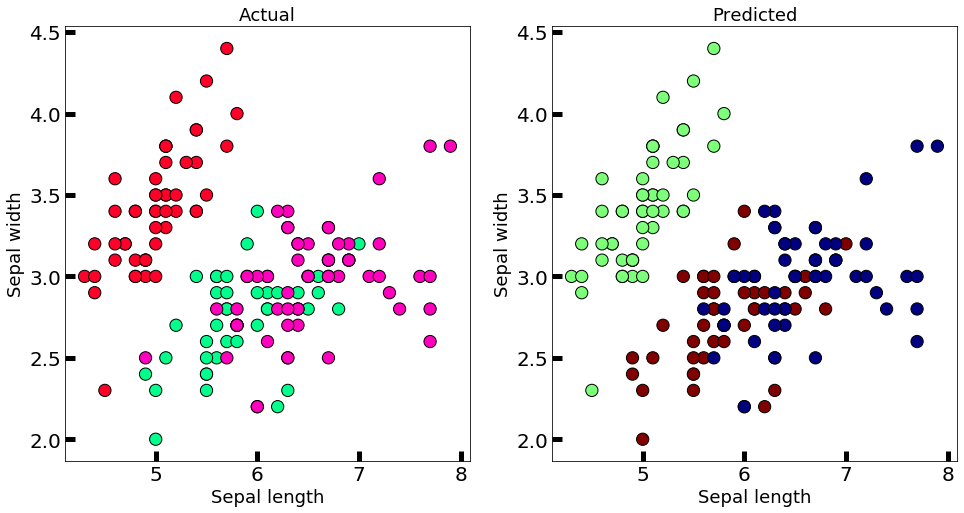

In [133]:
#this will tell us to which cluster does the data observations belong.
new_labels = K_mean.labels_
print(new_labels,labels)
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=X[:,4], cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [137]:
from sklearn import datasets

iris = datasets.load_iris()

In [140]:
X = iris.data[:,:2]
Y = iris.target

In [141]:
X[0:5]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

In [142]:
Y[0:5]

array([0, 0, 0, 0, 0])

In [176]:
k_means = KMeans(init='k-means++',n_clusters=3, n_init=12)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

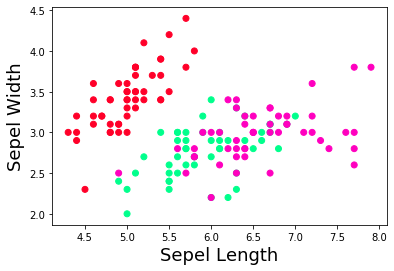

In [177]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap='gist_rainbow')
plt.xlabel('Sepel Length',fontsize=18)
plt.ylabel('Sepel Width',fontsize=18)
plt.show()

In [178]:
label = k_means.labels_
print(label)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]


Text(0.5, 1.0, 'Predicted')

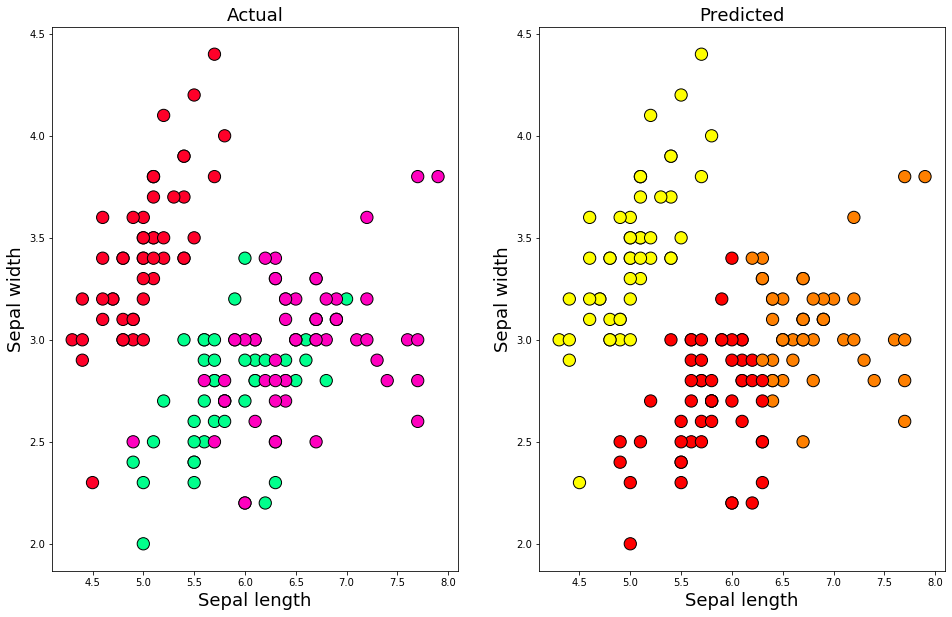

In [190]:
fig,ax = plt.subplots(1,2,figsize=(16,10))
ax[0].scatter(X[:,0],X[:,1],c=Y,cmap='gist_rainbow',edgecolor='k', s=150)
ax[0].set_xlabel('Sepal length', fontsize=18)
ax[0].set_ylabel('Sepal width', fontsize=18)
ax[1].scatter(X[:,0],X[:,1],c=label,cmap='autumn',edgecolor='k', s=150)
ax[1].set_xlabel('Sepal length', fontsize=18)
ax[1].set_ylabel('Sepal width', fontsize=18)
ax[0].set_title('Actual', fontsize=18)
ax[1].set_title('Predicted', fontsize=18)

Text(0.5, 0, 'Species')

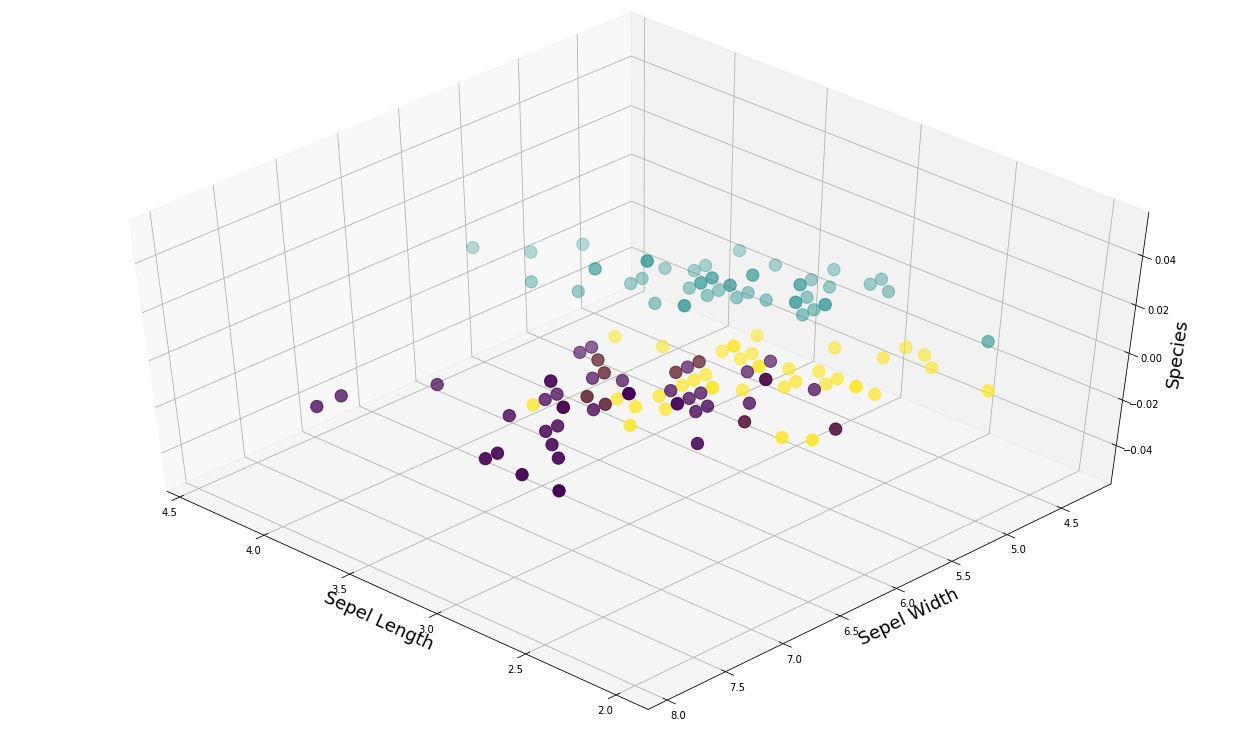

In [189]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(18, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

ax.scatter(X[:, 1], X[:, 0], c= labels.astype(np.float),s =150)
ax.set_xlabel('Sepel Length',fontsize=18)
ax.set_ylabel('Sepel Width',fontsize=18)
ax.set_zlabel('Species',fontsize=18)